In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:

bmi_mean = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(bmi_mean)
missing_values_count = df.isna().sum()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [6]:
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [7]:
# Drop the 'id' column from the DataFrame
df = df.drop('id', axis=1)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: int(x / 10) * 10)
df['age'] = df['age'].apply(lambda x: int(x / 10) * 10)
df['bmi'] = df['bmi'].apply(lambda x: int(x / 5) * 5)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


In [8]:

work_type_map = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
df['work_type'] = df['work_type'].map(work_type_map)

smoking_status_map = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3}
df['smoking_status'] = df['smoking_status'].map(smoking_status_map)

df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)


In [12]:
# df.work_type.unique()
# df.Residence_type.unique()
df.smoking_status.unique()

array([1, 0, 2, 3], dtype=int64)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.layers import (Input, Dense, Dropout, Activation, ZeroPadding2D, 
                          BatchNormalization, Flatten, Conv2D, Embedding, Add,
                          Conv1D, GlobalAveragePooling1D, AveragePooling2D, 
                          MaxPooling2D, MaxPool1D, ZeroPadding1D, 
                          GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D)
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D
from keras.utils import plot_model
from keras import layers


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

df = df.sample(frac=1).reset_index(drop=True)

y = df['stroke']
x = df.iloc[:, 0:11].astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Print shape of data
print("train X shape=" + str(x_train.shape))
print("train y shape=" + str(y_train.shape))
print("test X shape=" + str(x_test.shape))
print("test y shape=" + str(y_test.shape))


train X shape=(4088, 11)
train y shape=(4088,)
test X shape=(1022, 11)
test y shape=(1022,)


In [15]:
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
ann_model.compile(optimizer=Adam(lr=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Plot the model architecture
tf.keras.utils.plot_model(
    ann_model,
    to_file='ann_model.png',
    show_shapes=True,
    show_layer_names=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 8,130
Trainable params: 8,130
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = ann_model.fit(x_train, y_train,batch_size= 15,
epochs=30,
verbose=1,
validation_data = (x_test, y_test))

Epoch 1/30
273/273 [==============================] - 2s 2ms/step - loss: 0.2441 - accuracy: 0.9457 - val_loss: 0.1693 - val_accuracy: 0.9579
Epoch 2/30
273/273 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9474 - val_loss: 0.1484 - val_accuracy: 0.9579
Epoch 3/30
273/273 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9464 - val_loss: 0.1421 - val_accuracy: 0.9589
Epoch 4/30
273/273 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9496 - val_loss: 0.1175 - val_accuracy: 0.9589
Epoch 5/30
273/273 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9587 - val_loss: 0.0929 - val_accuracy: 0.9853
Epoch 6/30
273/273 [==============================] - 1s 2ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0096 - val_accuracy: 0.9990
Epoch 7/30
273/273 [==============================] - 1s 2ms/step - loss: 0.0255 - accuracy: 0.9946 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 

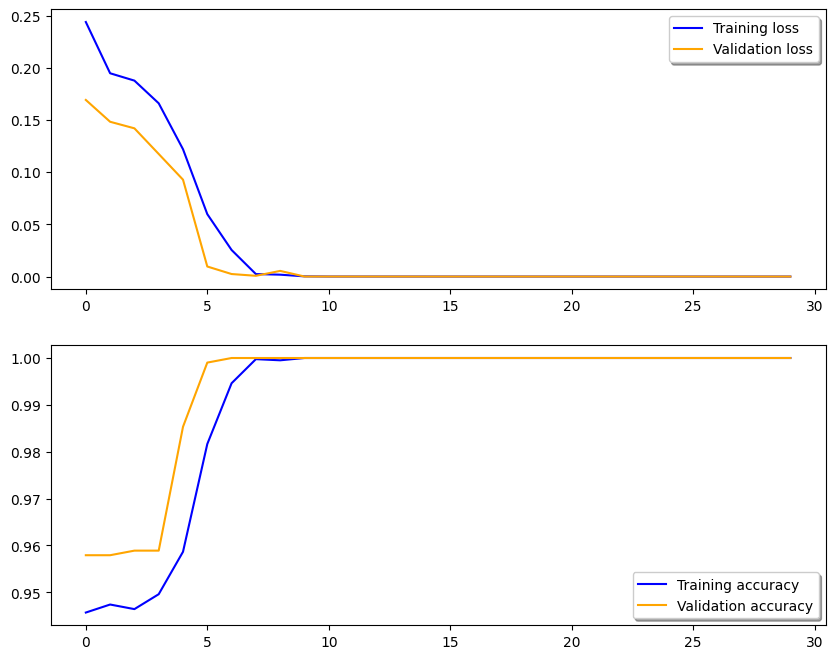

In [18]:
# Plot the loss and accuracy curves for training and validation 
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='orange', label="Validation loss")
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
ax2.legend(loc='best', shadow=True)

plt.show()
